In [ ]:
##mount the data directory
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir("gdrive/MyDrive/aYin/landscape")

Mounted at /content/gdrive


In [ ]:
##install pyshp to create ArcGIS Shapefile
!pip install pyshp

In [ ]:
###import Python packages
import pandas as pd
import networkx as nx
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

In [ ]:
##Function to get the coordinates of the centroid of the admininstrative boundary of a country
def get_country_coordinates():
    mFile = open("code/coordinates.csv")
    coord_all = {}
    for ele in mFile:
        data = ele.rstrip().split(',')
        country = data[1].replace("\"", "").replace(" ", "")
        coord = str(float(data[-1].replace("\"",""))) + "," + str(float(data[-2].replace("\"","")))
        # print(country, coord)
        # print(type(coord
        coord_all[country] = coord
    return coord_all

In [ ]:
def get_dict():
	all_coords = get_country_coordinates()
	# mFile = open("analysis/data/forest_landscape_restoration_country_tab.tsv", "r",encoding="cp437", errors='ignore')
	# mFile = open("analysis/data/landscape_restoration_country_tab.tsv", "r",encoding="cp437", errors='ignore')
	# mFile = open("analysis/data/ecosystem_restoration_country_tab.tsv", "r",encoding="cp437", errors='ignore')
	mFile = open("analysis/data/ecological_restoration_country_tab.tsv", "r",encoding="cp437", errors='ignore')

	next(mFile)
	countries = {}
	for ele in mFile:
		data = ele.rstrip().split('\t')
		country = data[-3]
		if country != "":
			# coord = data[-2]
			coord = all_coords[country]
			author = data[-33]
			if author in countries:
				pass
			else:
				countries[author] = [country,coord]
	return countries

In [ ]:
###This is the code that restrict nodes with country informaiton only
import networkx as nx
from matplotlib import pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
import networkx.algorithms.community as nxcom

# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

G = nx.Graph()

# df = pd.read_csv("analysis/data/forest_landscape_restoration_country_tab.tsv", sep ='\t')
# df = pd.read_csv("analysis/data/landscape_restoration_country_tab.tsv", sep ='\t')
# df = pd.read_csv("analysis/data/ecosystem_restoration_country_tab.tsv", sep ='\t')
df = pd.read_csv("analysis/data/ecological_restoration_country_tab.tsv", sep ='\t')

df['retweeted_username'].replace('', np.nan, inplace=True)
df.dropna(subset=['retweeted_username'], inplace=True)
df['entities.mentions'].replace('', np.nan, inplace=True)
df.dropna(subset=['entities.mentions'], inplace=True)
df['entities.mentions'] = df['entities.mentions'].apply(literal_eval)
# print(df.head())
countries = get_dict()
for index, row in df.iterrows():
  orgNode = row["retweeted_username"]
  mcoord = row["coord"]
  mym = row["year_month"]
  myear = row["year"]
  if orgNode in countries:
    if orgNode in G.nodes():
      nx.set_node_attributes(G, { orgNode:{'coord': countries[orgNode][1], 'ym':mym, 'year': myear, 'country':countries[orgNode]}})
    else:
      #'person1', name='John Doe', age=40
      G.add_node(orgNode, coord = countries[orgNode][1], ym = mym, year = myear, country = countries[orgNode])
  else:
    pass
  data = row["entities.mentions"]
  for ele in data:
    destNode = str(ele).replace("@", "")
    if destNode in countries:
      if destNode in G.nodes():
        nx.set_node_attributes(G, { destNode:{'coord': countries[destNode][1], 'ym':mym, 'year': myear, 'country':countries[destNode]}})
        G.add_edge(orgNode, destNode)
      else:
        G.add_node(destNode, ym = mym, year = myear, country = countries[destNode], coord = countries[destNode][1])
        G.add_edge(orgNode,destNode)
print(G.edges())
    # print(row["retweeted_username"], row["entities.mentions"])
remove = [node for node,degree in dict(G.degree()).items() if degree < 3]
G.remove_nodes_from(remove)
G.remove_edges_from(nx.selfloop_edges(G))

communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
    # Count the communities
print(f"The graph has {len(communities)} communities.")
# for ele in communities:
#   print(len(ele))

print("Number of communities:", len(communities))
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
# print("Network diameter:", nx.diameter(G))
# print("Average degree:", nx.average_degree_connectivity(G))
print("Average clustering coefficient :", nx.average_clustering(G))
print("network local efficiency", nx.local_efficiency(G))
print("network global efficiency", nx.global_efficiency(G))
# print("small-world coefficient (omega)", nx.omega(G))
# print("small-world coefficient (sigma)", nx.sigma(G, niter=10))
# rc = nx.rich_club_coefficient(G, normalized=False, seed=42)


<ipython-input-19-3b76cc47b036>:21: DtypeWarning: Columns (7,29,31,32,33,54,55,56,57,58,59,60,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("analysis/data/ecological_restoration_country_tab.tsv", sep ='\t')


[('ColumbiaEstuary', 'SERestoration'), ('SERestoration', 'SER_Europe'), ('SERestoration', 'rachelohry'), ('SERestoration', 'Martin_A_Nunez'), ('SERestoration', 'CLRA_National'), ('SERestoration', 'IslandPress'), ('SERestoration', 'FSC_Africa'), ('SERestoration', 'alinacfisher'), ('SERestoration', 're_sprout'), ('SERestoration', 'RestoreCAL'), ('SERestoration', 'mlungele'), ('SERestoration', 'RestEcol_UA'), ('SERestoration', 'Laura_J_Martin'), ('SERestoration', 'KamilaSvobodov7'), ('SERestoration', 'AmritaCreate'), ('SERestoration', 'ICRAF'), ('SERestoration', 'bgci'), ('SERestoration', 'MadoloLumka'), ('SERestoration', 'ftmaestre'), ('SERestoration', 'LeightonReid'), ('SERestoration', 'temperton_vicky'), ('SERestoration', 'Biohabitats'), ('SERestoration', 'PabloPastos'), ('SERestoration', 'USGS_WGSC'), ('SERestoration', 'ser_wc'), ('SERestoration', 'CIFOR'), ('SERestoration', 'ManuelGuarigua1'), ('SERestoration', 'annxuma'), ('SERestoration', 'IncaseProject'), ('SERestoration', 'Britis

In [ ]:
## Create shapefile for each node with community information
import shapefile
# w = shapefile.Writer('shp2/forest_landscape', shapefile.POINT)
# w = shapefile.Writer('shp2/landscape', shapefile.POINT)
# w = shapefile.Writer('shp2/ecosystem', shapefile.POINT)
w = shapefile.Writer('shp2/ecological', shapefile.POINT)
w.field('name', 'C')
w.field('country', 'C')
w.field('community','N',decimal=0)
for index, community in enumerate(communities):
  # print(community)
  for ele in community:
    if 'country' in G.nodes[ele]:
      # print(ele)
      country = G.nodes[ele]['country']
      latlng = country[1].split(",")
      mCountry = country[0]
      w.point(float(latlng[0]), float(latlng[1]))
      # w.record()
      w.record(name=ele, community=index, country = mCountry)
w.close()

In [ ]:
# ## Create shapefile for edges
import shapefile
# w = shapefile.Writer('shp2/line/forest_landscape', shapefile.POLYLINE)
# w = shapefile.Writer('shp2/line/landscape', shapefile.POLYLINE)
# w = shapefile.Writer('shp2/line/ecosystem', shapefile.POLYLINE)
w = shapefile.Writer('shp2/line/ecological', shapefile.POLYLINE)

w.field('name', 'C')
w.field('community','N', decimal=0)
for index, community in enumerate(communities):
    for ele in community:
        if 'country' in G.nodes[ele]:
          lines = []
          country = G.nodes[ele]['country']
          latlng = country[1].split(",")
          lines.append([float(latlng[0]), float(latlng[1])])
          mCountry = country[0]
          ww = G.nodes[ele]
          dests = G.edges(ele)
          for xx in dests:
            dest = xx[1]
            if 'coord' in G.nodes[dest]:
              # print(G.nodes[dest])
              country2 = G.nodes[dest]['country']
              latlng2 = country2[1].split(",")
              lines.append([float(latlng2[0]), float(latlng2[1])])
              w.line([lines])
              w.record(name=ele, community=index)
w.close()

In [ ]:
def set_node_community(G, communities):
  for c, v_c in enumerate(communities):
    for v in v_c:
      G.nodes[v]['community'] = c + 1
def set_edge_community(G):
  for v, w, in G.edges:
    if G.nodes[v]['community'] == G.nodes[w]['community']:
      G.edges[v, w]['community'] = G.nodes[v]['community']
    else:
      G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
  r0, g0, b0 = 0, 0, 0
  n = 16
  low, high = 0.1, 0.9
  span = high - low
  r = low + span * (((i + r_off) * 3) % n) / (n - 1)
  g = low + span * (((i + g_off) * 5) % n) / (n - 1)
  b = low + span * (((i + b_off) * 7) % n) / (n - 1)
  return (r, g, b)

In [ ]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# Set community color for edges between members of the same community (internal) and intra-community edges (external)
# external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
# internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]

external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 6]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] < 7]

internal_color = ['black' for e in internal]

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

In [ ]:
from networkx.drawing.nx_agraph import graphviz_layout

823
number of nodes in community
95
94


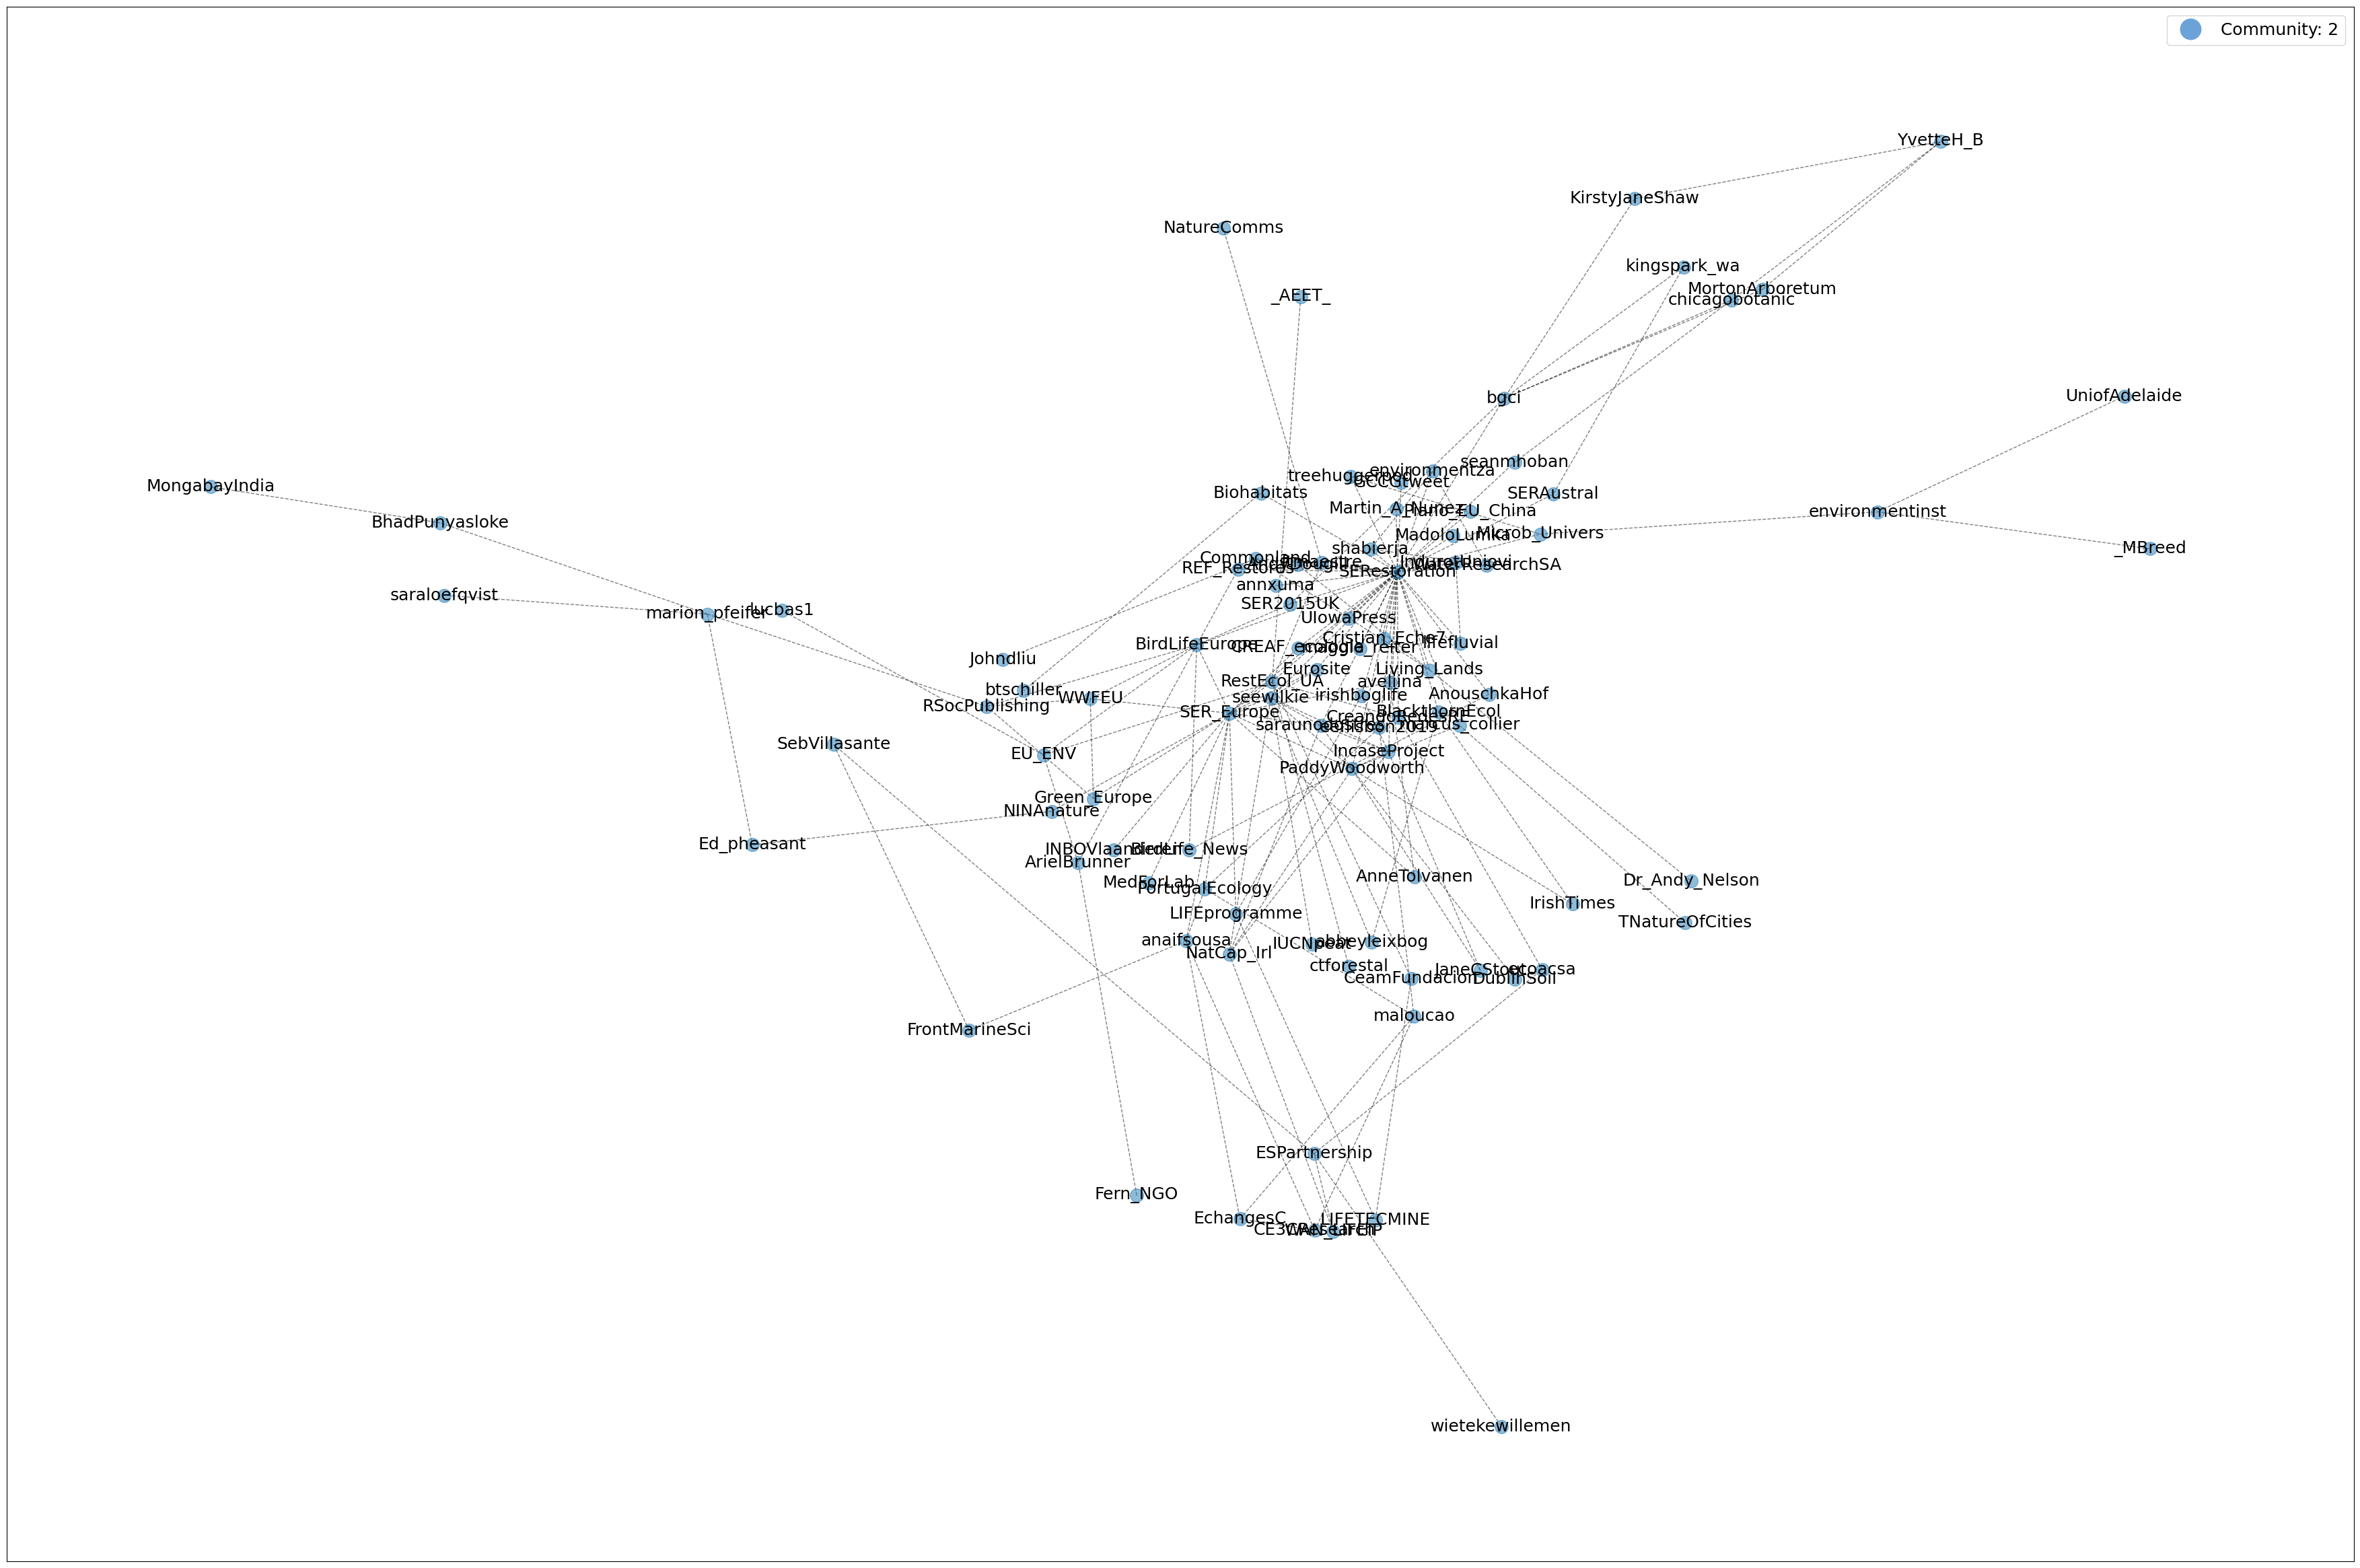

In [ ]:
from matplotlib.lines import Line2D
# karate_pos = nx.spring_layout(G, k=.75)
pos = graphviz_layout(G)
karate_pos = {}
for node in G.nodes():
  karate_pos[node] = pos[node]
plt.rcParams.update({'figure.figsize': (45, 30)})

legend_elements=[]
labels = {}
xx_color =[]

remove = []
count =[]
all = []
top1 = []
for node in G.nodes():
  all.append(node)
  if G.nodes[node]['community'] == 2:
    labels[node] = node
    count.append(node)
  else:
    remove.append(node)
    if G.nodes[node]['community'] == 1:
      top1.append(node)
# print(nodes)
print(len(all))
print("number of nodes in community")
print(len(top1))
print(len(count))
G.remove_nodes_from(remove)


# for ele in [1,2,3,4,5]:
for ele in [1]:
  xx_color = get_color(ele)
  legend_elements.append(Line2D([0], [0], marker='o', color='w', label='Community: ' + str(2), markerfacecolor = xx_color, markersize=24))
    # Draw external edges
# nx.draw_networkx(
#         G,
#         pos=karate_pos,
#         with_labels=False,
#         node_color=node_color,
#         # node_size=0,
#         edgelist=external,
#         edge_color="silver",
#         style=":")
# nx.draw_networkx_labels(G, pos=karate_pos, labels=labels, font_size=16, font_color='r')

# #     # Draw nodes and internal edges
nx.draw_networkx(
        G,
        pos=karate_pos,
        node_size=200,
        with_labels=False,
        # node_color=node_color,
        # edgelist=internal,
        # edge_color=internal_color,
        alpha=.5,
        edge_color="black",
        style="--"
        )
nx.draw_networkx_labels(G, pos=karate_pos, labels=labels, font_size=18)
# plt.legend()
plt.legend(handles=legend_elements, loc='upper right', fontsize = 18)

# plt.savefig("forest_landscape_community_top2.jpg", dpi=300)
# plt.savefig("landscape_community_top2.jpg", dpi=300)
# plt.savefig("Ecosytem_community_top2.jpg", dpi=300)
plt.savefig("Ecological_community_top2.jpg", dpi=300)

plt.show()